<a href="https://colab.research.google.com/github/al464314-gif/Perceptron/blob/main/Classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linearly separable classification with a perceptron

Perceptrons not only can model logical functions, but they are linear classifiers that work well for linearly separable problems.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
%matplotlib inline

def plot_decision_boundary(net):
    # Obtenemos los pesos (weights) y el sesgo (bias) aprendidos
    w = net.coef_[0]
    b = net.intercept_[0]

    # Generamos puntos para dibujar la línea (eje X)
    x_plot = np.linspace(-1, 2, 100)

    # Calculamos la altura de la línea (eje Y) usando la ecuación de la recta:
    # w1*x1 + w2*x2 + b = 0  ==>  x2 = -(w1/w2)*x1 - (b/w2)
    y_plot = -(w[0] / w[1]) * x_plot - (b / w[1])

    # Dibujamos la línea azul
    plt.plot(x_plot, y_plot, 'b-')

    # Ajustamos los límites para que se vea igual a tu ejemplo
    plt.xlim(-1, 1.2)
    plt.ylim(-1.2, 1.2)

def plot_data(X, y):

    # Puntos donde y es 0 (Clase 0) -> Rojos
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', s=100, edgecolors='k')
    # Puntos donde y es 1 (Clase 1) -> Negros
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='black', s=100, edgecolors='k')
    plt.grid(False)

## Load in the data

Let's imagine that there are two classes of dots (red and black). Each dot is defined by two features. The dataset consists of a matrix `x` with as many rows as dots, and two columns, and the vector `y` with as many elements as dots. The value of `y[i]` is 0 for red dots and 1 for black dots.

You must fill in the values of the second row of matrix `x` and vector `y`, at your choice, with these restrictions:
* the values of matrix `x` must be between 1 and 7 (inclusive)
* the values of vector `y` must be 0's (red dots) or 1's (black dots)
* there should be between 5 and 9 red dots (inclusive)
* the set of red dots must be **linearly separable** from the set of black dots

In [8]:
 # Estrategia: x coordenadas pequeñas (1-3) -> Rojos. Grandes (5-7) -> Negros.
x = np.array([[2,2],[1,3],[2,3],[5,3],[7,3],[2,4],[3,4],\
              [1,5], [2,5], [2,6], [5,4], [6,4], [6,5], [7,5]])

# Definimos el vector y (0=Rojo, 1=Negro) coincidiendo con cada par de arriba.
# Los primeros 7 puntos ya venían dados, así que asignamos sus clases:
# [2,2]->0, [1,3]->0, [2,3]->0, [5,3]->1, [7,3]->1, [2,4]->0, [3,4]->0
# Los siguientes 7 los inventamos nosotros siguiendo la regla:
# [1,5]->0, [2,5]->0, [2,6]->0, [5,4]->1, [6,4]->1, [6,5]->1, [7,5]->1

y = np.array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

## Plot the data

Let's represent graphically the data. Make sure that the sets are linearly separable.

In [9]:
def plot_decision_boundary(net):
    w = net.coef_[0]
    b = net.intercept_[0]

    # Generamos puntos de 0 a 8 para que la línea cruce todo el gráfico
    x_plot = np.linspace(0, 8, 100)

    # Calculamos y
    y_plot = -(w[0] / w[1]) * x_plot - (b / w[1])

    plt.plot(x_plot, y_plot, 'b-', label='Decision Boundary')

## Build the model
Create a [perceptron object](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

In [10]:
# Importamos la librería necesaria aquí mismo para evitar el error
import sklearn.linear_model

# Creamos el objeto Perceptrón
net = sklearn.linear_model.Perceptron(max_iter=100, eta0=0.1, random_state=1)
# Creamos el objeto Perceptrón
net = sklearn.linear_model.Perceptron(max_iter=100, eta0=0.1, random_state=1)

## Train
Repeat the following cell (`Ctrl+Enter`) until the model converges.

Coefficient 0:  0.800
Coefficient 1: -0.800
         Bias: -0.300
    Target: [0 0 0 1 1 0 0 0 0 0 1 1 1 1]
Prediction: [0 0 0 1 1 0 0 0 0 0 1 1 1 1]


/tmp/ipython-input-669189071.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("         Bias: %6.3f" % net.intercept_)


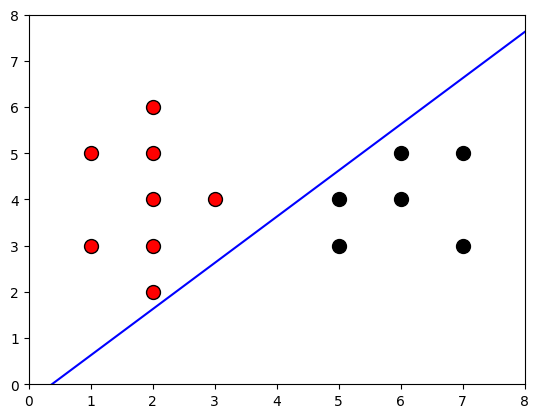

In [11]:
# ADD THE NECESSARY STATEMENTS HERE
net.fit(x, y)
# DON'T MODIFY THE CODE BELOW
print("Coefficient 0: %6.3f" % net.coef_[0,0])
print("Coefficient 1: %6.3f" % net.coef_[0,1])
print("         Bias: %6.3f" % net.intercept_)
plot_data(x, y)
plt.axis([0,8,0,8]);
plot_decision_boundary(net)
print('    Target: %s' % np.array_str(y))
print('Prediction: %s' % np.array_str(net.predict(x)))

When the model converges, the perceptron boundary completely separates the samples of each class (0's and 1's).